In [4]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [4]:
# ls

In [5]:
# data_path = '../../../raw_data/tripcsvbame-1_year.csv'

In [6]:
# data=pd.read_csv(data_path)

In [7]:
# type(data)

In [8]:
# data['usage-stats/'][301:306]

In [9]:
# data['usage-stats/'][0]

In [10]:
# data['usage-stats/']=data['usage-stats/'].apply(lambda x: x.strip())
# data

In [11]:
# def read_url(url):
#     s=requests.get(url).content
#     c=pd.read_csv(io.StringIO(s.decode('utf-8')))
#     return c

In [12]:
# data

In [13]:
# data_2023=data
# frames=[]
# link="https://cycling.data.tfl.gov.uk/usage-stats/"
# #for x in data_2023.index:
# #    file=link+item[1:]
# #    frame.append(read_url(file))
#   # print((data_path + data_2023['usage-stats/'][x]).replace(' ',''))
# #  frames.append(pd.read_csv(data_path + data_2023['usage-stats/'][x]))

# for item in data_2023['usage-stats/']:
#     file=link+item
#     frames.append(read_url(file))
# result = pd.concat(frames)
# result

In [14]:
# data_2023.iloc[0]

In [15]:
dict_columns = {
    "Number": "Rental Id",
    "Total duration (ms)": "Duration",
    "Bike number" : "Bike Id",
    "Start station" : 'StartStation Name',
    'End station': 'EndStation Name',
    'End Date': 'End date',
    'Start Date': 'Start date'
}

In [16]:
# result_general = result.rename(columns=dict_columns)
# result_general['Duration'] = result_general['Duration']/1000
# result_general

In [17]:
# date_format = '%d/%m/%Y %H:%M:%S'
# result_general['End date']=pd.to_datetime(result_general['End date'])
# result_general['Start date']=pd.to_datetime(result_general['Start date'])
# result_general

In [18]:
# results_f = result_general[result_general['Duration']<3600]

In [19]:
# results_f

In [20]:
# len(result_general)

In [21]:
# len(results_f)

In [22]:
# result=results_f.dropna()
# new_result=result.set_index('Start date').groupby([pd.Grouper(freq='h'), 'StartStation Name', 'EndStation Name']).count()
# new_result

In [23]:
# new_result.columns

In [24]:
# new_result['No of trips']=new_result['Duration']

In [25]:
# new_result

In [26]:
# new_result = new_result[['No of trips']]

In [1]:
import pandas as pd
query = '''
  SELECT *
  FROM `wagon-bootcamp-396316.londonbss.data2022`
'''
df = pd.read_gbq(query, project_id="wagon-bootcamp-396316")
df

KeyboardInterrupt: 

In [28]:
df2=df

In [29]:
df=df2

In [30]:
df.columns

Index(['_StartDate', '_StartStationName', '_EndStationName', '_Nooftrips'], dtype='object')

In [31]:
new_names={}
for column_name in df.columns:
    new_names[column_name]=column_name.replace('_','').lstrip().replace(' ','')
new_names
df=df.rename(columns=new_names)
df


,StartDate,StartStationName,EndStationName,Nooftrips
0,2022-10-04 18:00:00,"Somerset House, Strand","Fournier Street, Whitechapel",1
1,2022-10-04 18:00:00,"Sardinia Street, Holborn","Westferry Circus, Canary Wharf",1
2,2022-10-04 18:00:00,"Portugal Street, Holborn","Rampayne Street, Pimlico",1
3,2022-10-04 18:00:00,"Bouverie Street, Temple","Vauxhall Walk, Vauxhall",1
4,2022-10-04 18:00:00,"Wenlock Road , Hoxton","Endsleigh Gardens, Euston",1
...,...,...,...,...
9822518,2022-07-05 21:00:00,"Frith Street, Soho","Columbia Road, Shoreditch",1
9822519,2022-07-05 21:00:00,"Bunhill Row, Moorgate","Breams Buildings, Holborn",1
9822520,2022-07-05 21:00:00,"Clarkson Street, Bethnal Green","Russell Square Station, Bloomsbury",1
9822521,2022-07-05 21:00:00,"Lambeth Road, Vauxhall","Lambeth North Station, Waterloo",1


In [32]:
#df=df.drop(columns=['index'])
#df.head()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822523 entries, 0 to 9822522
Data columns (total 4 columns):
 #   Column            Dtype         
---  ------            -----         
 0   StartDate         datetime64[us]
 1   StartStationName  object        
 2   EndStationName    object        
 3   Nooftrips         Int64         
dtypes: Int64(1), datetime64[us](1), object(2)
memory usage: 309.1+ MB


In [34]:
df = df.reset_index(drop=True)
df = df.sort_values(by=['StartDate'])
df = df.reset_index(drop=True)

In [35]:
total_stations = pd.concat([df['StartStationName'],df['EndStationName']])
total_uniq_stations = np.unique(total_stations).tolist()
len(total_uniq_stations)

816

In [36]:
total_hours = np.unique(df['StartDate']).tolist()
len(total_hours)

8684

In [37]:
i = len(total_uniq_stations)
k = len(total_hours)
trips_3darray = np.zeros((i,i,k))
trips_3darray=trips_3darray.astype(np.int8)

In [38]:
df.shape

(9822523, 4)

In [39]:
from sklearn.preprocessing import OrdinalEncoder
df["date_code"] = 0
df["so_code"] = 0
df["sd_code"] = 0
ord_enc = OrdinalEncoder()
df["date_code"] = ord_enc.fit_transform(df[["StartDate"]])
df["so_code"] = ord_enc.fit_transform(df[["StartStationName"]])
df["sd_code"] = ord_enc.fit_transform(df[["EndStationName"]])
df


,StartDate,StartStationName,EndStationName,Nooftrips,date_code,so_code,sd_code
0,2022-01-01,"Wellington Arch, Hyde Park","Eastbourne Mews, Paddington",2,0.0,777.0,223.0
1,2022-01-01,"Abingdon Green, Westminster","Bayswater Road, Hyde Park",2,0.0,4.0,53.0
2,2022-01-01,"Erin Close, Walham Green","Westfield Southern Terrace ,Shepherd's Bush",1,0.0,236.0,796.0
3,2022-01-01,"Waterloo Bridge, South Bank","Bayley Street , Bloomsbury",2,0.0,768.0,51.0
4,2022-01-01,"Somerset House, Strand","Southampton Street, Strand",4,0.0,643.0,656.0
...,...,...,...,...,...,...,...
9822518,2022-12-31,"Kensington Church Street, Kensington","Parsons Green Station, Parsons Green",1,8683.0,394.0,535.0
9822519,2022-12-31,"Westfield Ariel Way, White City","Westfield Ariel Way, White City",1,8683.0,792.0,794.0
9822520,2022-12-31,"Belgrove Street , King's Cross","Horseferry Road, Westminster",2,8683.0,59.0,363.0
9822521,2022-12-31,"Clifford Street, Mayfair","Albany Street, The Regent's Park",3,8683.0,166.0,11.0


In [2]:
df=pd.read_csv('year_data.csv')

In [7]:
df=df.drop(['Unnamed: 0','index'],axis=1)

In [8]:
df

,StartDate,StartStationName,EndStationName,Nooftrips,date_code,so_code,sd_code
0,2022-01-01 00:00:00,"Wellington Arch, Hyde Park","Eastbourne Mews, Paddington",2,0.0,777.0,223.0
1,2022-01-01 00:00:00,"Abingdon Green, Westminster","Bayswater Road, Hyde Park",2,0.0,4.0,53.0
2,2022-01-01 00:00:00,"Erin Close, Walham Green","Westfield Southern Terrace ,Shepherd's Bush",1,0.0,236.0,796.0
3,2022-01-01 00:00:00,"Waterloo Bridge, South Bank","Bayley Street , Bloomsbury",2,0.0,768.0,51.0
4,2022-01-01 00:00:00,"Somerset House, Strand","Southampton Street, Strand",4,0.0,643.0,656.0
...,...,...,...,...,...,...,...
9822448,2022-12-31 00:00:00,"Kensington Church Street, Kensington","Parsons Green Station, Parsons Green",1,8683.0,394.0,535.0
9822449,2022-12-31 00:00:00,"Westfield Ariel Way, White City","Westfield Ariel Way, White City",1,8683.0,792.0,794.0
9822450,2022-12-31 00:00:00,"Belgrove Street , King's Cross","Horseferry Road, Westminster",2,8683.0,59.0,363.0
9822451,2022-12-31 00:00:00,"Clifford Street, Mayfair","Albany Street, The Regent's Park",3,8683.0,166.0,11.0


In [42]:
df=df[df.EndStationName!='Mechanical Workshop Clapham']

In [43]:
df=df[df.EndStationName!='Mechanical Workshop Penton']

In [44]:
#new_row=pd.DataFrame({'StartDate':'2022-01-01','StartStationName':'Mechanical Workshop Penton','EndStationName':'Westbourne Grove, Bayswater','Nooftrips':0,'date_code':0,'so_code':456.0,'sd_code':789.0},index=[0])

In [45]:
#df=pd.concat([new_row,df.loc[:]]).reset_index(drop=True)
df=df.reset_index()

In [9]:
df.to_csv('year_data.csv')

In [16]:
df

,StartDate,StartStationName,EndStationName,Nooftrips,date_code,so_code,sd_code
0,2022-01-01 00:00:00,"Wellington Arch, Hyde Park","Eastbourne Mews, Paddington",2,0.0,777.0,223.0
1,2022-01-01 00:00:00,"Abingdon Green, Westminster","Bayswater Road, Hyde Park",2,0.0,4.0,53.0
2,2022-01-01 00:00:00,"Erin Close, Walham Green","Westfield Southern Terrace ,Shepherd's Bush",1,0.0,236.0,796.0
3,2022-01-01 00:00:00,"Waterloo Bridge, South Bank","Bayley Street , Bloomsbury",2,0.0,768.0,51.0
4,2022-01-01 00:00:00,"Somerset House, Strand","Southampton Street, Strand",4,0.0,643.0,656.0
...,...,...,...,...,...,...,...
9822448,2022-12-31 00:00:00,"Kensington Church Street, Kensington","Parsons Green Station, Parsons Green",1,8683.0,394.0,535.0
9822449,2022-12-31 00:00:00,"Westfield Ariel Way, White City","Westfield Ariel Way, White City",1,8683.0,792.0,794.0
9822450,2022-12-31 00:00:00,"Belgrove Street , King's Cross","Horseferry Road, Westminster",2,8683.0,59.0,363.0
9822451,2022-12-31 00:00:00,"Clifford Street, Mayfair","Albany Street, The Regent's Park",3,8683.0,166.0,11.0


In [15]:
df=df.drop('Unnamed: 0.1',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('index',axis=1)
# tationName':'Mechanical Workshop Clapham','EndStationName':'Westbourne Grove, Bayswater','Nooftrips':0,'date_code':0,'so_code':455.0,'sd_code':789},index=[0])

In [10]:
#df=pd.concat([new_row,df.loc[:]]).reset_index(drop=True)
df=pd.read_csv('year_data.csv')

In [6]:
len(df['EndStationName'].unique())

814

In [7]:
arr=np.zeros((816,816,744))

for index, row in df.iterrows():
    if row['date_code']<=743:
        x=row['so_code']
        y=row['sd_code']
        z=row['date_code']
        x=int(x)
        y=int(y)
        z=int(z)
        arr[x,y,z]+=1
    else:
        break

In [46]:
import tensorflow as tf
#coords = df[['so_code','sd_code','date_code']]
tensor_dense = tf.convert_to_tensor(arr)

In [60]:
tl.norm(tensor_dense, 2)

810.9593084736126

In [48]:
tensor_sparse = tf.sparse.from_dense(tensor_dense)

In [53]:
tensor_sparse.shape

TensorShape([816, 816, 744])

In [58]:
tensor_sparse.ndim

AttributeError: 'SparseTensor' object has no attribute 'ndim'

In [61]:
import tensorly
from tensorly.decomposition import tucker as dense_t

cores, factors = dense_t(tensor_dense,30)

/Users/thammadoltansrivorarat/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/tensorly/tucker_tensor.py:425: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 3. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)


: 

: 

In [186]:
coords = df[['so_code','sd_code','date_code']]
coords

,so_code,sd_code,date_code
0,777.0,223.0,0.0
1,4.0,53.0,0.0
2,236.0,796.0,0.0
3,768.0,51.0,0.0
4,643.0,656.0,0.0
...,...,...,...
9822448,394.0,535.0,8683.0
9822449,792.0,794.0,8683.0
9822450,59.0,363.0,8683.0
9822451,166.0,11.0,8683.0


In [190]:
pd.DataFrame(columns = coords['sd_code'], index=coords['so_code'])

: 

: 

In [36]:
values = df['Nooftrips']
values

0          2
1          2
2          1
3          2
4          4
          ..
9822448    1
9822449    1
9822450    2
9822451    3
9822452    2
Name: Nooftrips, Length: 9822453, dtype: int64

In [146]:
coords = np.array(coords, dtype=int).T
values = np.array(values, dtype=float)

In [184]:
import tensorflow as tf
tensor_dense = tf.convert_to_tensor(coords)

In [185]:
tensor_dense.shape

TensorShape([9822453, 3])

In [148]:
tensor_sparse = tf.sparse.from_dense(tensor_dense)

In [149]:
print(tensor_sparse)

SparseTensor(indices=tf.Tensor(
[[      0       0]
 [      0       1]
 [      1       0]
 ...
 [9822452       0]
 [9822452       1]
 [9822452       2]], shape=(29437788, 2), dtype=int64), values=tf.Tensor([7.770e+02 2.230e+02 4.000e+00 ... 2.890e+02 7.890e+02 8.683e+03], shape=(29437788,), dtype=float64), dense_shape=tf.Tensor([9822453       3], shape=(2,), dtype=int64))


In [150]:
type(tensor_sparse)

tensorflow.python.framework.sparse_tensor.SparseTensor

In [33]:
import tensorly as tl
from tensorly.contrib.sparse.decomposition import partial_tucker as sparse_pt

In [34]:
tucker_rank = [30, 30, 35]

In [35]:
tensor_sparse.shape


NameError: name 'tensor_sparse' is not defined

In [49]:
cp_result = sparse_pt(tensor_sparse,30)

NameError: name 'tensor_sparse' is not defined

In [172]:
tucker_rec = tl.tucker_to_tensor((core, factors))

NameError: name 'core' is not defined

In [82]:
timeframe_pos = 0
for trip in df.index:
    so = total_uniq_stations.index(df['StartStationName'][trip])
    sd = total_uniq_stations.index(df['EndStationName'][trip])
    trips_3darray[so][sd][timeframe_pos] += 1
    if trip < df.index[-1]:
       if df['StartDate'][trip] != df['StartDate'][trip+1]:
           timeframe_pos += 1

In [83]:
trips_3darray

array([[[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [84]:
trips_3darray[:,:,1].sum()

865

In [85]:
trips_3darray.shape

(816, 816, 8684)

In [86]:
all_trips=trips_3darray[:,:,0]
all_trips

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

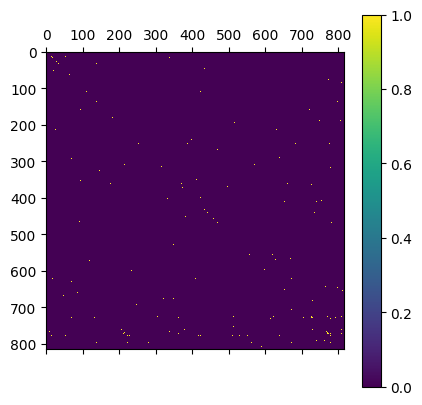

In [87]:
plt.matshow(all_trips)
plt.colorbar()
plt.show()

## Tensor Decomposition

In [88]:
!pip install tensorly

In [1]:
import tensorly as tl
from tensorly.contrib.sparse.decomposition import tucker

In [90]:
#Represent the trips as a tensor
tensor_trip = tl.tensor(trips_3darray, dtype='float32')

In [91]:
tensor_trip.shape

(816, 816, 8684)

In [92]:
# Rank of Tucker decomposition
tucker_rank = [30, 30, 35]

In [93]:
%%time
core, factors = tucker(tensor_trip, rank=tucker_rank, init='random', tol=10e-5,random_state=12345)

CPU times: user 6min 27s, sys: 4min 46s, total: 11min 14s
Wall time: 3min 17s


In [94]:
#Convert the tucker tensor into a full tensor
tucker_rec = tl.tucker_to_tensor((core, factors))

: 

: 

In [ ]:
factors[0].shape

In [ ]:
factors[1].shape

In [ ]:
factors[2].shape

In [ ]:
import requests

In [ ]:
response= requests.get('https://api.tfl.gov.uk/BikePoint/')
stations = response.json()

In [ ]:
data =  pd.DataFrame()
s_names = []
s_lat = []
s_lon = []

NbBikes = []
NbEmptyDocks = []
NbDocks = []
NbStandardBikes = []
NbEBikes = []
s_id = []

In [ ]:
len_lat = 0
for station in stations:
    s_names.append(station['commonName'])
    s_lat.append(float(station['lat']))
    s_lon.append(float(station['lon']))
    for add_property in station['additionalProperties']:
        if add_property['key'] == 'NbBikes':
            NbBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEmptyDocks':
            NbEmptyDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbDocks':
            NbDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbStandardBikes':
            NbStandardBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEBikes':
            NbEBikes.append(int(add_property['value']))
        if add_property['key'] == 'TerminalName':
            s_id.append(int(add_property['value']))


In [ ]:
data['Station_name'] = s_names
data['s_lat'] = s_lat
data['s_lon'] = s_lon
data['s_num_bikes'] = NbBikes
data['s_num_empty_docks'] = NbEmptyDocks
data['s_num_std_bikes'] = NbStandardBikes
data['s_num_e-bikes'] = NbEBikes
data['s_num_docks'] = data['s_num_bikes'] + data['s_num_empty_docks']
data['s_id'] = s_id

In [ ]:
data

In [ ]:
# South East limits
se_limit_lat = 51.523811 # everthing lower than this value is south east
se_limit_lon = -0.101342 # everything greater than this value is south east

# East limits
e_limit_lat = 51.523811 # everything greater than this value is east
e_limit_lon = -0.022306 # everything greater than this is east

# South West limits
sw_limit_lat = 51.501631 # everthing lower than this value is south east
sw_limit_lon = -0.101342 # everything lower than this value is south east

# West limits
w_limit_lat = 51.501072  # everthing greater than this value is south east
w_limit_lon = -0.182406  # everthing lower than this value is south east

# Central limits
c_toplimit_lat = 51.501072 # everthing greater than this value is central
c_lowlimit_lat = 51.523811 # everything lower than this value is central

c_toplimit_lon = -0.101342 # everything lower than this value is central
c_lowlimit_lon = -0.182406 # everthing greater than this value is central

# North limits
n_toplimit_lon = -0.022306 # everything lower than this value is central
n_lowlimit_lon = -0.182406 # everthing greater than this value is central

n_lowlimit_lat = 51.523811 # everthing greater than this value is central

In [ ]:
loc = []

In [ ]:
for station in data.index:
    if data['s_lat'][station] > c_toplimit_lat and data['s_lat'][station]< c_lowlimit_lat and data['s_lon'][station]< c_toplimit_lon and data['s_lon'][station]>c_lowlimit_lon:
        loc.append(1) # Central
    elif data['s_lon'][station] < n_toplimit_lon and data['s_lon'][station] > n_lowlimit_lon and data['s_lat'][station] > n_lowlimit_lat:
        loc.append(2) # North
    elif data['s_lon'][station] < w_limit_lon and data['s_lat'][station] > w_limit_lat:
        loc.append(3) # West
    elif data['s_lon'][station] < sw_limit_lon and data['s_lat'][station] < sw_limit_lat:
        loc.append(4)  # South_West
    elif data['s_lon'][station] > e_limit_lon and data['s_lat'][station] > e_limit_lat:
        loc.append(5) # East
    elif data['s_lon'][station] > se_limit_lon and data['s_lat'][station] < se_limit_lat:
        loc.append(6) # South East
    else:
        loc.append('Other')

In [ ]:
data['Area_loc'] = loc

In [ ]:
data

In [ ]:
data.loc[data.Station_name == 'Chepstow Villas, Notting Hill'].values[0][9]

In [ ]:
color_stations = []
for station in total_uniq_stations:
  info_val = data.loc[data.Station_name == station].values
  if len(info_val)>0:
    color_stations.append(data.loc[data.Station_name == station].values[0][9])
  else:
    color_stations.append(7)

In [ ]:
len(color_stations)

In [ ]:
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[0], c=color_stations)
axs[0, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[0], c=color_stations)
axs[0, 2].plot(np.transpose(factors[2])[0])

axs[1, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[1], c=color_stations)
axs[1, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[1], c=color_stations)
axs[1, 2].plot(np.transpose(factors[2])[1])

axs[2, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[2], c=color_stations)
axs[2, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[2], c=color_stations)
axs[2, 2].plot(np.transpose(factors[2])[2])

axs[3, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[3], c=color_stations)
axs[3, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[3], c=color_stations)
axs[3, 2].plot(np.transpose(factors[2])[3])

axs[4, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[4], c=color_stations)
axs[4, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[4], c=color_stations)
axs[4, 2].plot(np.transpose(factors[2])[4])

In [ ]:
factors[2].shape

In [ ]:
type(factors[2])

In [ ]:
from google.colab import files

In [ ]:
# convert array into dataframe
result_df = pd.DataFrame(factors[2])

In [ ]:
result_df['timestamp'] = pd.to_datetime(total_hours)

In [ ]:
# result_df.to_csv('filename.csv')
# files.download('filename.csv')